In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [3]:
from keras import utils
import matplotlib.pyplot as plt

from generation.gaugan import GauganPredictor
from segmentation.unet import UnetModel
from convert import convert_mc2real

2023-06-29 02:06:06.224590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 02:06:06.671349: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/klima7/studies/gsn/minecraft/workspace_v2/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
generator = GauganPredictor(
    'generation/trained_models/generator.h5',
    'generation/trained_models/encoder.h5'
)

2023-06-29 02:06:08.615648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 02:06:08.630208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 02:06:08.630348: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
segmentator = UnetModel()
segmentator.load_weights('segmentation/trained_models/unet.h5')

In [23]:
dataset = utils.image_dataset_from_directory(
    directory='data/1/minecraft',
    image_size=(256, 256),
    labels=None,
    batch_size=1,
)

Found 580 files belonging to 1 classes.


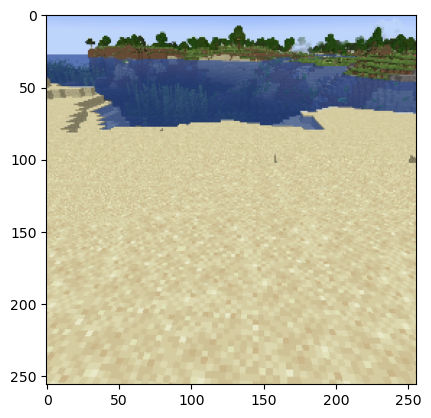

In [40]:
mc_image = next(iter(dataset))[0].numpy() / 255
plt.imshow(mc_image)

2023-06-29 02:08:04.898896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [1,256,256,25]
	 [[{{node Placeholder/_1}}]]


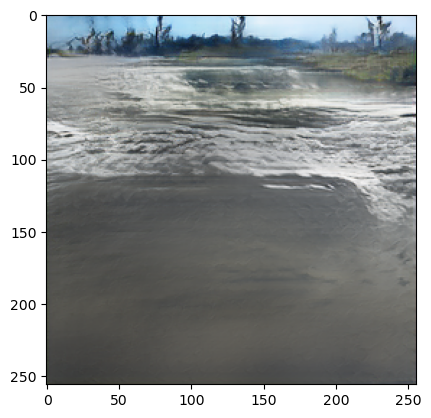

In [41]:
real_image = convert_mc2real(mc_image, generator, segmentator)
plt.imshow(real_image)